In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Source density(g/cm3) and Vs(km/s)

vr = 3.5 
pr = 2.75

In [3]:
profile = pd.read_csv('Vs profile.txt',delimiter='\t')
depth = profile['z (km)'].values
vs = profile[' Vs (km/sec)'].values
thickness = np.insert(np.diff(depth),0,depth[0])

In [4]:
freq = np.logspace(-1,2,100)
tt = 1/(4*freq)

In [5]:
z_eql = []
for i in tt:
    tt_prof = 0
    z = 0
    for t,v in zip(thickness,vs):
        if tt_prof + t/v <= i:
            tt_prof = tt_prof + t/v
            z = z+t
        else:
            diff_tt = i - tt_prof
            z = z+ diff_tt*v
            break
            

    z_eql.append(z)

In [6]:
vs_eql = np.array(z_eql)/tt

In [7]:
density_eql = []
for i in z_eql:
    z = 0
    d = 0
    j = 0
    while z+thickness[j] < i:
        d = d+(1.742 + 0.2875*vs[j])*thickness[j]
        z = z+thickness[j]

        j = j+1
        
    diff_z = i-z
    d = d+(1.742 + 0.2875*vs[j])*diff_z

    density_eql.append(d/i)
            

In [8]:
amp = np.sqrt((pr*vr)/(density_eql*vs_eql))

In [9]:
site_amp_linda = pd.read_csv('Amplification.txt',delimiter = '\t')

In [10]:
f_linda = site_amp_linda['Frequency (Hz)'].values
amp_linda = site_amp_linda['Site Amp'].values

In [11]:
import QWL

In [12]:
amp_fun = QWL.Amplification(vs,depth)

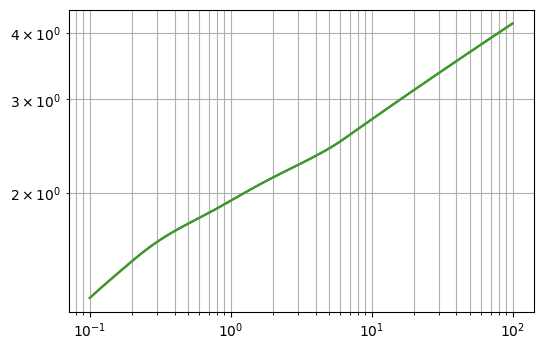

In [13]:
fig,ax = plt.subplots(dpi = 100)
ax.loglog(freq,amp)
ax.loglog(f_linda,amp_linda)
ax.loglog(amp_fun.freq,amp_fun.site_amp)
ax.grid('both',which='both')